# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import Household


# Question 1

Explain the Code

In the following, we illustrate how the relative hours worked by women at home compared to men's change as $\alpha$ and $\sigma$ are varied. 

For the code to function, we have altered line 57 in the Household.py file, such at it not only decribes the case where the $\sigma$=1. But, also the $\sigma$=0 and neither 1 nor 0.

c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:64: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma+1e-8)+par.alpha*HF**((par.sigma-1)/par.sigma+1e-8))**(par.sigma/(par.sigma+1e-8-1))


with an alpha = 0.25 and a sigma = 0.5, we get that HF/HM = 3.00 / 5.50 = 0.55
with an alpha = 0.25 and a sigma = 1.0, we get that HF/HM = 2.00 / 6.50 = 0.31
with an alpha = 0.25 and a sigma = 1.5, we get that HF/HM = 1.50 / 7.00 = 0.21
with an alpha = 0.5 and a sigma = 0.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.0, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.75 and a sigma = 0.5, we get that HF/HM = 5.50 / 3.00 = 1.83
with an alpha = 0.75 and a sigma = 1.0, we get that HF/HM = 6.50 / 2.00 = 3.25
with an alpha = 0.75 and a sigma = 1.5, we get that HF/HM = 7.00 / 1.50 = 4.67


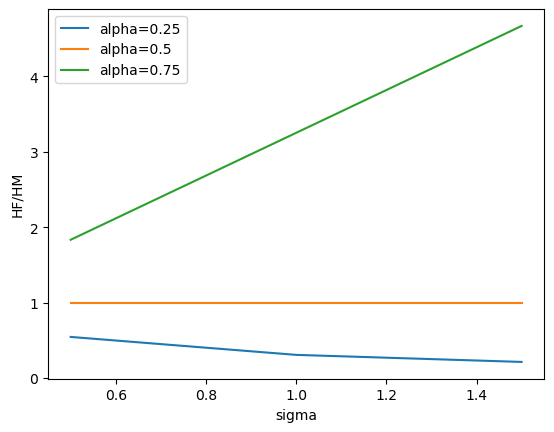

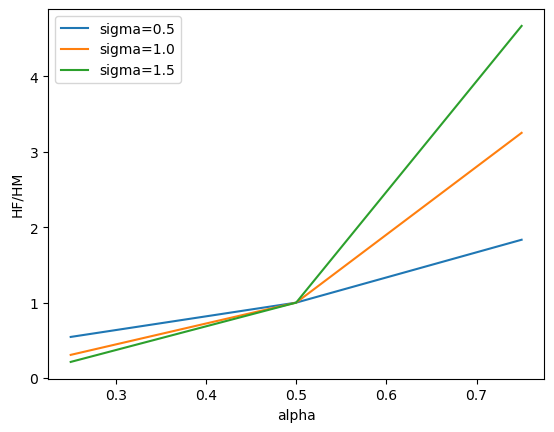

In [3]:
# Define the necessary parameters
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# initialize dictionary to store results
resultsHF = {}
resultsHM = {}
resultsHFHNM = {}

# foreach combination of alpha and sigma, print the ratio of optimal HF/HM
for alpha in alpha_list:    
    for sigma in sigma_list:
        # set new values for alpha and sigma
        model = Household.HouseholdSpecializationModelClass()
        model.par.alpha = alpha
        model.par.sigma = sigma

        # solve the model
        opt = model.solve_discrete()
        # store the result
        resultsHF[(alpha, sigma)] = opt.HF
        resultsHM[(alpha, sigma)] = opt.HM
        resultsHFHNM[(alpha, sigma)] = opt.HF/opt.HM

        # print results
        print(f"with an alpha = {alpha} and a sigma = {sigma}, we get that HF/HM = {opt.HF:.2f} / {opt.HM:.2f} = {opt.HF/opt.HM:.2f}")
                       
# plot the results
fig, ax = plt.subplots()
for alpha in alpha_list:
    y = [resultsHFHNM[(alpha, sigma)] for sigma in sigma_list]
    ax.plot(sigma_list, y, label=f"alpha={alpha}")
ax.set_xlabel("sigma")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()

# plot the results 2.0
fig1, ax = plt.subplots()
for sigma in sigma_list:
    y = [resultsHFHNM[(alpha, sigma)] for alpha in alpha_list]
    ax.plot(alpha_list, y, label=f"sigma={sigma}")
ax.set_xlabel("alpha")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()

## Interpretation of results in Question 1
The parameter $\alpha$ pertains to the productivity in the home production for females relative to males, $\frac{\alpha}{1-\alpha}$. Call this ratio $\xi$. For the given values of $\alpha$, the productivity in the home production is:
-  $\xi_{\alpha=0.25}=0.25/0.75=0.33$
-  $\xi_{\alpha=0.5}=0.5/0.5=1$
-  $\xi_{\alpha=0.75}=0.75/0.25=3$

For a given elasticity of substition, $\sigma$, the productivity in home production increases as $\alpha$ increases. $\alpha$ illustrates how much home work of women weighs in the total consumption of home production. As the productivity in home production increases in $\alpha$, i.e. when work of women weighs more than work of men, women work more productively at home relative to men. 


For $\alpha$ > 0.5 the return from women working at home is larger than the return from men doing so, and vice versa when $\alpha$ < 0.5. When $\alpha$ = 0.5, the return on home production is the same for men and women. 
In the case where $\alpha $ > 0.5, women will take on a relatively larger part of the home work, as the elasticity of substitution, $\sigma$, increases. Similarly for $\alpha $ < 0.5, men take on a larger part of the home work. 


The elasticity of substitution, $\sigma$, does not affect the ratio of house work of women to house work of men when, so long as the return on women's and men's home work is the same, i.e. $\alpha$ = 0.5.

# Question 2

## Explain the code.

In the following we will remake the plot from Question 2 only with a continuous choice set, i.e. $L_M, L_F, H_M, H_F \in [0,24]$.

The wages for females are [0.8 0.9 1.  1.1 1.2]


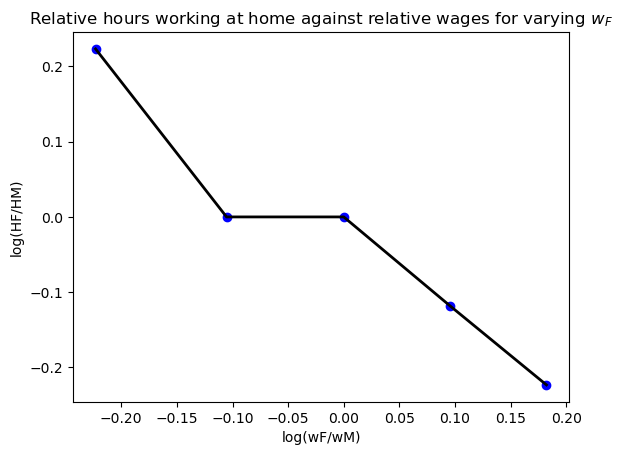

In [4]:
import numpy as np
from types import SimpleNamespace
from Household import HouseholdSpecializationModelClass

# 1. Create an instance of the HouseholdSpecializationModelClass
model_2 = HouseholdSpecializationModelClass()
# unpack the parameters
par = model_2.par
par.alpha = 0.5
par.sigma = 1.0

# 2. Define the vector of wage rates
wf = model_2.par.wF_vec
print(f"The wages for females are {wf}")
           
# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)

# 4. Loop over the wage rates and find the optimal labor supply
for i, wage in enumerate(wf):
    model_2.par.wF = wage
    opt = model_2.solve_discrete()
    ratio = opt.HF/opt.HM
    temp_ratio[i]=ratio

    # 5. Print or plot the results
    #print(ratio)
   
# 6. Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(wf), np.log(temp_ratio), color='black', lw=2) # the famale wage is equal to the relative becuase wM = 1
plt.xlabel("log(wF/wM)")
plt.ylabel("log(HF/HM)")
plt.title("Relative hours working at home against relative wages for varying $w_F$")

# 6. Add data points
x_data = np.log(np.linspace(0.8, 1.2, 5))
y_data = np.log(temp_ratio[:5])
plt.scatter(x_data, y_data, color='blue')

# 7. Show the graph
plt.show()

## Interpretation of Question 2

The lower the wages of females are, the lower the logarithmic relative wages between women and men are and the higher the logarithmic relative home work between women and men are. 

As the wages of women increase, the relative wages increase and the hours spent working at home for women drecrease relatively to men. When $w_F=1$, men and women spend the same amount of hours working at home. When men and women earn the same wage, neither men or women have a comparative advantage in working at home or in the market.

# Question 3

Repeat the above with a continoues choice set. 

The way we choose to model the continuous model is adding more observations to the discrete. This we believe is a decent approximation for a continuous.

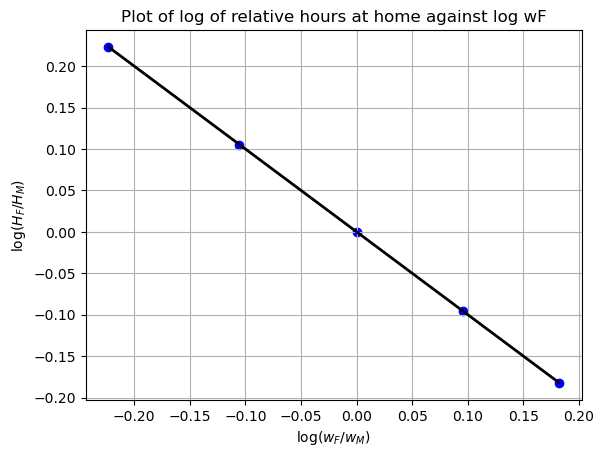

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from types import SimpleNamespace
from Household import HouseholdSpecializationModelClass 
import Household

model_3 = HouseholdSpecializationModelClass()
par = model_3.par
sol = model_3.sol

# initialize vectors to store the results
sol.HF_vec = np.zeros_like(par.wF_vec)
sol.HM_vec = np.zeros_like(par.wF_vec)

# bounds on the hours worked
bounds = ((0, 24), (0, 24), (0, 24), (0, 24))

# contraints on the hours worked
def cons(x):
    return [x[0] + x[1] - 24, x[2] + x[3] - 24]

# relative wage vector
relative_wage = np.log(par.wF_vec)

# initialize vector to store the ratio of hours worked
lnratio = np.zeros_like(relative_wage)

# initial guess for the hours worked
initial_guess = [4, 4, 4, 4]  

# constraints on the hours worked
constraints = {'type': 'ineq', 'fun': cons}

# unpack the wage vector
wf = model_3.par.wF_vec

# For each value of wF, solve the model and store the result
for i, wage in enumerate(wf):
    model_3.par.wF = wage  
    obj = lambda x: -model_3.calc_utility(x[0], x[1], x[2], x[3])
    solution = optimize.minimize(obj, initial_guess, method="SLSQP", bounds=bounds, constraints=constraints, tol=0)
    # if solution.success:
    sol.HM_vec[i] = solution.x[1]
    sol.HF_vec[i] = solution.x[3]
    # store the ratio of hours worked
    lnratio[i] = np.log(solution.x[3]/solution.x[1])

# create figure
fig = plt.figure()

# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, lnratio, color='black', lw=2)
ax.scatter(relative_wage, lnratio, color='blue')

# alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log wF")

plt.show()



# Question 4

$Log(H_F/H_M) = \beta_0 + \beta_1 Log(w_F/w_M)$

We solve this with the discrete model. 

In the following code the expression: $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$ is minimized by checking different values of $\sigma$ and $\alpha$.

The values of $\sigma$ and $\alpha$, $\beta_0$ and $\beta_1$, and the value of $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$ is reported each time a new combination of $\sigma$ and $\alpha$ results in a smaller value of $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$. 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from types import SimpleNamespace
from Household import HouseholdSpecializationModelClass 
import Household

# 1. Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# 2. Define the vector of wage rates
wf = model.par.wF_vec
print(f"The wages for females are {wf}")
        
# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)
temp_beta0= np.zeros_like(wf)
temp_beta1= np.zeros_like(wf)

# Define the alpha and sigma lists
alpha_list = np.linspace(0.1, 1,10)
sigma_list = np.linspace(0.1, 1,10)

temp_beta_sol =10
temp_alpha_opt=0
temp_sigma_opt=0
beta0=0
beta1=0

# 4. Loop over the wage rates and find the optimal labor supply
for alpha in alpha_list:    
    for sigma in sigma_list:
        for i, wage in enumerate(wf): #Creates HF_vec and HM_vec for run_regression() function
            model.par.wF = wage
            model.par.alpha = alpha
            model.par.sigma = sigma
            opt = model.solve_discrete()
            model.sol.HF_vec[i]=opt.HF
            model.sol.HM_vec[i]=opt.HM
            ratio = opt.HF/opt.HM
            temp_ratio[i]=ratio
            # 5. Print or plot the results
        
        model.run_regression()
        if abs((model.par.beta0_target-model.sol.beta0)**2+(model.par.beta1_target-model.sol.beta1)**2 < temp_beta_sol):
            temp_beta_sol=abs(model.par.beta0_target-model.sol.beta0)**2+(model.par.beta1_target-model.sol.beta1)**2
            temp_alpha_opt=alpha
            temp_sigma_opt=sigma
            beta0=model.sol.beta0
            beta1=model.sol.beta1
            print("updated")
            print(f"sigma= {temp_sigma_opt}, alpha= {temp_alpha_opt}, beta0={beta0}, beta1={beta1} temp_beta_sol= {temp_beta_sol}")

# model.run_regression()
# print(model.sol.beta1)
# print(model.sol.beta0)
# print(f"sigma= {temp_sigma_opt}, alpha= {temp_alpha_opt} temp_beta_sol= {temp_beta_sol}")

The wages for females are [0.8 0.9 1.  1.1 1.2]
updated
sigma= 0.1, alpha= 0.1, beta0=-0.22314355131420965, beta1=-2.199370101392506e-16 temp_beta_sol= 0.39830788554448493
updated
sigma= 0.1, alpha= 0.2, beta0=-0.11556062818108573, beta1=-0.02576022392605501 temp_beta_sol= 0.2713143056819852
updated
sigma= 0.1, alpha= 0.30000000000000004, beta0=-0.11319326762846346, beta1=-0.037273697579470993 temp_beta_sol= 0.2673019189545314
updated
sigma= 0.1, alpha= 0.4, beta0=0.0, beta1=0.0 temp_beta_sol= 0.17000000000000004
updated
sigma= 0.30000000000000004, alpha= 0.5, beta0=0.018849154408797853, beta1=-0.21848308367589253 temp_beta_sol= 0.159314208212237
updated
sigma= 0.2, alpha= 0.6, beta0=0.08739050666601794, beta1=-0.18349010610973188 temp_beta_sol= 0.10469529314074327
updated
sigma= 0.4, alpha= 0.6, beta0=0.1778890544365636, beta1=-0.3056957084199269 temp_beta_sol= 0.09164399660145939
updated
sigma= 0.30000000000000004, alpha= 0.7000000000000001, beta0=0.24019468555216708, beta1=-0.197641

c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:64: RuntimeWarning: invalid value encountered in multiply
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma+1e-8)+par.alpha*HF**((par.sigma-1)/par.sigma+1e-8))**(par.sigma/(par.sigma+1e-8-1))
C:\Users\Louise Boe Prahl\AppData\Local\Temp\ipykernel_3536\2359677173.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = opt.HF/opt.HM
c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:166: RuntimeWarning: divide by zero encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)


The optimal $\sigma$=0.2 and the $\alpha$=0.9. 

